In [1]:
#data manipulation
import pandas as pd
import numpy as np

In [4]:
#ML imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load dataset
data = pd.read_csv("audit_data.csv")
data.head()

,audit_id,audit_score,num_issues_found,audit_duration_days,is_compliant
0,1,88,8,28,0
1,2,78,6,6,0
2,3,64,4,4,0
3,4,92,3,24,1
4,5,57,4,12,0


In [11]:
#Features of the model
x = data.drop("is_compliant", axis = 1)

#Target
y = data["is_compliant"]

#80-20 train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
                    

In [12]:
#Training the model we are using, RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train, y_train) #Learn from training data
            

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Test accuracy is 1.00


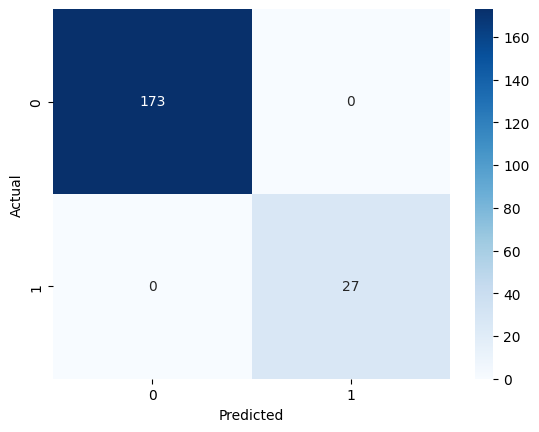

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00        27

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [18]:
#Prediction on test data
y_pred = rf_model.predict(x_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy is {accuracy:.2f}")

#confusion matrix
confmat = confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Classification report
print(classification_report(y_test, y_pred))